### EFM results

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio


def str_from_array(array):
    list = [i[0][0] for i in array]
    return list


In [2]:
input_EFM = 'myPremodels_simple.mat'


In [3]:
simple_efm = sio.loadmat(input_EFM)

simple_efm = simple_efm['modeli']
mets_c = str_from_array(simple_efm[0][0][0])

mets_e = str_from_array(simple_efm[0][0][1])

rxns = str_from_array(simple_efm[0][0][2])

sc = simple_efm[0][0][3]
se = simple_efm[0][0][4]
z = simple_efm[0][0][5]
sez = simple_efm[0][0][6]

Network matrix (S_c and S_e) for
- METINT
- METEXT

In [4]:
print(sc)
print(se)

[[ 0.    0.    0.   ...  0.    0.    0.  ]
 [ 0.    0.    0.   ...  0.    0.    0.  ]
 [ 1.    0.    1.   ... 30.48  1.    0.  ]
 ...
 [ 0.    0.    0.   ...  0.    0.    0.  ]
 [ 0.    0.    0.   ...  0.    0.    0.  ]
 [ 0.    0.    0.   ...  0.    0.    0.  ]]
[[-1.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.   -1.    0.    0.    0.    0.
   0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   1.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.  ]
 [ 0.  

- EFMs

- EFMs of METEXT

In [5]:
print(z)
print(sez)

# save table:
# np.savetxt('z_simple.tsv', z, delimiter='\t')
# np.savetxt('sez_simple.tsv', sez, delimiter='\t')

[[129.79787234 102.5106383    0.         ... 209.66608392 209.76573427
  224.70454545]
 [ 27.28723404   0.         -37.9775641  ... 178.62062937 170.94755245
  193.65909091]
 [207.64893617 180.36170213  26.83333333 ... 178.62062937 176.12937063
  193.65909091]
 ...
 [  2.12765957   2.12765957   0.96153846 ...   9.09090909   9.09090909
    9.09090909]
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.          27.28723404  96.23076923 ... 367.55944056 365.16783217
  202.13636364]]
[[-129.79787234 -102.5106383     0.         ... -209.66608392
  -209.76573427 -224.70454545]
 [-175.29787234 -175.29787234  -62.5224359  ...    0.
     0.            0.        ]
 [ 278.07446809  250.78723404   41.96153846 ...  176.84615385
   187.60839161  237.        ]
 ...
 [   2.12765957    2.12765957    0.96153846 ...    9.09090909
     9.09090909    9.09090909]
 [   0.            0.            0.         ...    0.
     0.            0.        ]
 [ 383.20212766  355.91489

EFMs only glc:  30
EFMs only xyl:  59
EFMs only glc and xyl:  169


/Users/lhao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


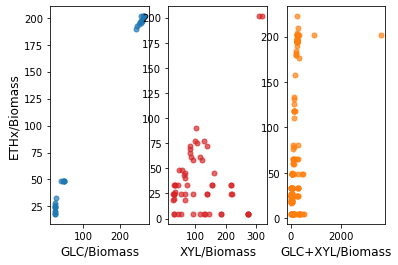

In [6]:
# plot
# x = eth/biomass; y = sub/biomass

sez = sez[:,sez[6,:]>0]/sez[6,(sez[6,:]>0)]


x_glc = np.absolute(sez[0,(sez[0,:]<0)&(sez[1,:]==0)])
x_xyl = np.absolute(sez[1,(sez[0,:]==0)&(sez[1,:]<0)])
x_glc_xyl = np.absolute((sez[0,(sez[1,:]<0)&(sez[0,:]<0)] + sez[1,(sez[1,:]<0)&(sez[0,:]<0)]))

print('EFMs only glc: ',x_glc.shape[0])
print('EFMs only xyl: ',x_xyl.shape[0])
print('EFMs only glc and xyl: ',x_glc_xyl.shape[0])

y_eth_glc = sez[2,(sez[0,:]<0)&(sez[1,:]==0)]
y_eth_xyl = sez[2,(sez[0,:]==0)&(sez[1,:]<0)]
y_eth_glc_xyl = sez[2,(sez[1,:]<0)&(sez[0,:]<0)]


fig = plt.figure()
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

ax1.plot(x_glc, y_eth_glc,'o',color = 'tab:blue',label = 'GLC',markersize=5,alpha = 0.7)
ax2.plot(x_xyl,y_eth_xyl, 'o',color = 'tab:red',label = 'XYL',markersize=5,alpha = 0.7,)
ax3.plot(x_glc_xyl,y_eth_glc_xyl, 'o',color = 'tab:orange',label = 'GLC+XYL',markersize=5,alpha = 0.7,)

ax1.set_ylabel('ETHx/Biomass',fontsize = 12)
ax1.set_xlabel('GLC/Biomass',fontsize = 12)
ax2.set_xlabel('XYL/Biomass',fontsize = 12)
ax3.set_xlabel('GLC+XYL/Biomass',fontsize = 12)
fig.show()
fig.savefig('simple.pdf')

